<a href="https://cocl.us/DL0320EN_TOP_IMAGE">
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0320EN/Assets/Images/Top.png" width="750" alt="IBM 10TB Storage">
</a>


<h1>Classifying European Money Denominations: Training a Pre-trained model  </h1>


<h2>Table of Contents</h2>


<p>In this lab, you will train the pre-trained models to classify the European currency. You will use the dataset object you created in the previous lab.</p>
<ul>
    <li><a href="#gen">Create Image Dataset Generator</a></li>
    <li><a href="#ques">Questions</a>
        <ol>
            <li><a href="q31">Question 3.1: Preparation</a></li>
            <li><a href="q32">Question 3.2: Train the model</a></li>
            <li><a href="q33">Question 3.3: Plot 5 Random Images with their predictions</a></li>
            <li><a href="q34">Question 3.4: Use the second model <code>VGG16</code> to do the prediction</a></li>
        </ol>
    </li>
    <li><a href="#save">Save the trained model</a></li>
</ul>

<p>Estimated Time Needed: <b>60 min</b></p>
<hr>


<h2>Preparation</h2>


<a href="https://cocl.us/DL0320EN_storage">
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0320EN/Assets/Images/ObjectStorage.png" width="750" alt="cognitive class">
</a>


Download the datasets you needed for this lab.


In [1]:
# You can comment out this box when you already have the dataset
# Step 1: Ctrl + A : Select all
# Step 2: Ctrl + / : Comment out all; if everything selected has been comment out alreaday, then uncomment all

# Download Training Dataset
!wget --quiet -O /resources/data/train_data_keras.tar.gz https://cocl.us/DL0320EN_TRAIN_TAR_KERAS
!tar -xzf /resources/data/train_data_keras.tar.gz -C /resources/data --exclude '.*'

# Download Validation Dataset
!wget --quiet -O /resources/data/validation_data_keras.tar.gz https://cocl.us/DL0320EN_VALID_TAR_KERAS
!tar -xzf /resources/data/validation_data_keras.tar.gz -C /resources/data --exclude '.*'

Import Keras Modules


In [2]:
# Keras Modules

import keras
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.models import Model

Using TensorFlow backend.
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jupyterlab/con

Import Non-Keras Modules 


In [3]:
# Non-Keras Modules

import os
from imageio import imread
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import random

<hr>


<h2 id="gen">Create Image Dataset Generator</h2>


In this section, you will need to generate the dataset by using what you learned from the previous labs.


The following code will store the paths of the image dataset.


In [4]:
# Store image dataset in the directory

train_data_dir = '/resources/data/train_data_keras'
validation_data_dir = '/resources/data/validation_data_keras'
classes = ['5', '10', '20', '50', '100', '200', '500']

Using <code>ImageDataGenerator().flow_from_directory()</code> to load the image from directory and generate the training dataset.


In [5]:
# Create the ImageDataGenerator for training dataset

train_generator = ImageDataGenerator().flow_from_directory(train_data_dir
                                                           , target_size=(224, 224)
                                                           , batch_size=10
                                                           , classes=classes
                                                           , seed=0
                                                           , shuffle=True)

Found 70 images belonging to 7 classes.


Using <code>ImageDataGenerator().flow_from_directory()</code> to load the image from directory and generate the validation dataset.


In [6]:
# Create the ImageDataGenerator for validation dataset

valid_generator = ImageDataGenerator().flow_from_directory(validation_data_dir
                                                           , target_size=(224, 224)
                                                           , batch_size=5
                                                           , classes=classes
                                                           , seed=0
                                                           , shuffle=True)

Found 70 images belonging to 7 classes.


<hr>


<h2 id="ques">Questions</h2>


<h3 id="q31">Question 3.1: Preparation</h3><b>5 point</b>


<b>Step 1</b>: Load the pre-trained model <b>ResNet50</b>. Set <code>weights='imagenet'</code>


In [7]:
# Step 1: Load the pre-trained model ResNet50

# Type your code here
base = ResNet50(weights='imagenet')

2024-04-09 19:51:44.212577: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
2024-04-09 19:51:44.219874: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2394330000 Hz
2024-04-09 19:51:44.223557: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x563f282ad440 executing computations on platform Host. Devices:
2024-04-09 19:51:44.223603: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>
2024-04-09 19:51:44.249022: W tensorflow/compiler/jit/mark_for_compilation_pass.cc:1412] (One-time warning): Not using XLA:CPU for cluster because envvar TF_XLA_FLAGS=--tf_xla_cpu_global_jit was not set.  If you want XLA:CPU, either set that envvar, or use experimental_jit_scope to enable XLA:CPU.  To confirm that XLA is active, pass --vmodule=xla_compilation_cache=1 (as a proper command-line fl


102858752/102853048 [==============================] - 0s 0us/step


<b>Step 2:</b> The following lines of code sets the attribute <code>trainable</code> to <code>False</code>. As a result, the parameters in these layers will not be affected by training.


In [8]:
# Step2: Set parameters in pre-train model to False

# Type your code here
for layer in base.layers:
    layer.trainable=False

<b>Step 3</b>: <b>ResNet50</b> is used to classify 1000 different objects; as a result, the last layer has 1000 outputs. However, you are going to classify 7 different classes, so you need to remove the last layer and replace with the new classification layer.


In [9]:
# Step 3: Replace the old classification layer with the new classification layer

# Type your code here
sec_last_base = base.layers[-2].output
connected_model = Dense(len(classes),activation='softmax')(sec_last_base)
base_input = base.input
model = Model(inputs=base_input, outputs=connected_model)

Print out the model in order to show whether you get the correct answer.<br> <b>(Your peer reviewer is going to mark based on what you print here.)</b>


In [10]:
# Print the model (PLEASE DO NOT MODIFY THIS BOX)

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

<h3 id="q32">Question 3.2: Train the model</h3><b>5 points</b>


<b>Step 1</b>: Use the <code>model.compile()</code> to set the configuration for the model. Use the optimizer <b>Adam</b>, loss function <b>categorical_crossentropy</b> and <code>metrics = ['accuracy']</code> as the parameters for training the model.


In [11]:
# Step 1: Use model.compile() to set the configuration

# Type your code here
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

<b>Step 2: </b>Train the model with 20 epochs.


In [12]:
# Step 2: Train the model

# Type your code here
N_EPOCHES = 20
STEPS = train_generator.n // train_generator.batch_size
model.fit_generator(generator=train_generator,validation_data=valid_generator,steps_per_epoch=STEPS,epochs=N_EPOCHES)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/20
7/7 [==============================] - 75s 11s/step - loss: 1.8812 - acc: 0.2714 - val_loss: 2.1025 - val_acc: 0.2714
Epoch 2/20
7/7 [==============================] - 79s 11s/step - loss: 0.8769 - acc: 0.9143 - val_loss: 1.6709 - val_acc: 0.5000
Epoch 3/20
7/7 [==============================] - 78s 11s/step - loss: 0.4077 - acc: 0.9857 - val_loss: 1.4435 - val_acc: 0.5571
Epoch 4/20
7/7 [==============================] - 74s 11s/step - loss: 0.2754 - acc: 0.9857 - val_loss: 1.3708 - val_acc: 0.5714
Epoch 5/20
7/7 [==============================] - 71s 10s/step - loss: 0.1511 - acc: 1.0000 - val_loss: 1.2515 - val_acc: 0.5286
Epoch 6/20
7/7 [==============================] - 72s 10s/step - loss: 0.1149 - acc: 1.0000 - val_loss: 1.3637 - val_acc: 0.4286
Epoch 7/20
7/7 [==============================] - 80s 11s/step - loss: 0.0808 - acc: 1.0000 - val_loss: 1.2854 - val_acc: 0.4429
Epo

The information of loss and accuarcy for both training and validation is in <code>model.history.history</code>. Get the training history, and store the history into <code>train_history</code>.


In [13]:
# Get the training history

train_history = model.history.history

<b>Step 3</b>: Plot out the result of loss for both training and validation.<br> <b>(Your peer reviewer is going to mark based on what you plot here.)</b>


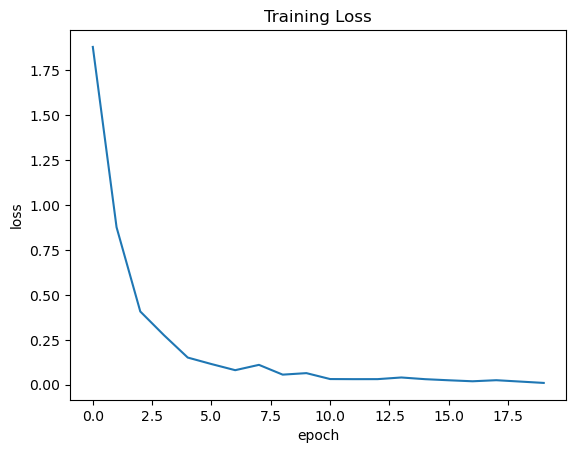

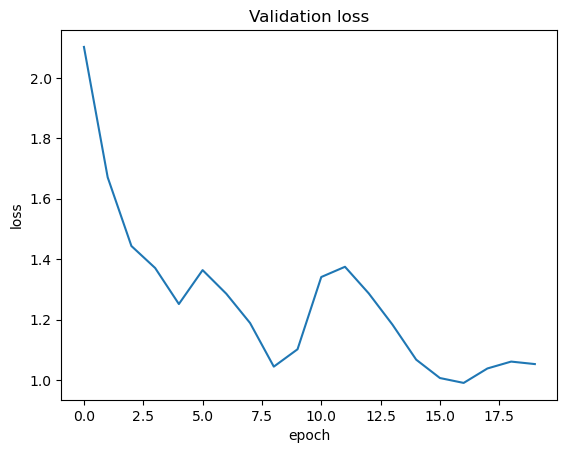

In [14]:
# Step 3: Plot the loss for both training and validation

# Type your code here
plt.title("Training Loss")
plt.ylabel("loss")
plt.xlabel('epoch')
plt.plot(train_history['loss'])
plt.show()

plt.title("Validation loss")
plt.ylabel("loss")
plt.xlabel('epoch')
plt.plot(train_history['val_loss'])
plt.show()

<b>Step 4</b>: Plot out the result of accuracy for both training and validation.<br> <b>(Your peer reviewer is going to mark based on what you plot here.)</b>


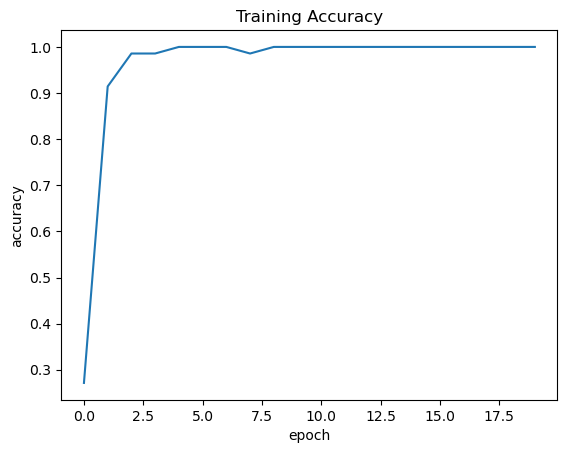

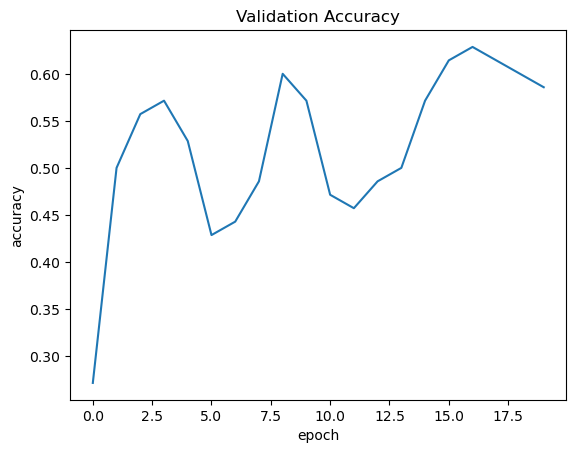

In [15]:
# Step 4: Plot the accuracy for both training and validation

# Type your code here
plt.title("Training Accuracy")
plt.ylabel("accuracy")
plt.xlabel('epoch')
plt.plot(train_history['acc'])
plt.show()

plt.title("Validation Accuracy")
plt.ylabel("accuracy")
plt.xlabel('epoch')
plt.plot(train_history['val_acc'])
plt.show()

<h3 id="q33">Question 3.3: Plot 5 Random Images with their predictions</h3><b>3 points</b>


Use the <b>validation_dataset</b> to see whether model can predict. (You will use the <b>test_dataset</b> in the future lab. Use the <b>validation_dataset</b> for now.) Notice that you need to set the <code>shuffle</code> to <code>False</code>, so the the order of predictions will be the same as the file loading order.


In [16]:
# Generate test dataset and generate the prediction results

test_valid_generator = ImageDataGenerator().flow_from_directory(validation_data_dir
                                                           , target_size=(224, 224)
                                                           , batch_size=5
                                                           , classes=classes
                                                           , seed=0
                                                           , shuffle=False)

Found 70 images belonging to 7 classes.


Create a test dataset using validation data. Plot 5 random images which index is in the <code>numbers</code> list. Also print the predicted label and print a string indicate whether it has been correctly classified or mis-classified.<br> <b>(Your peer reviewer is going to mark based on what you plot here.)</b>
<p>Steps:</p>
<ol>
    <li>Use <code>MODEL.predict_generator()</code> to do the prediction</li>
    <li>Use <code>np.argmax()</code> to find the location of the maximum value</li>
    <li>Get the class labels from <code>train_generator</code> using <code>train_generator.filenames</code></li>
    <li>Get the class indices from the previous step using <code>train_generator.class_indices</code></li>
    <li>Match classes with labels like <code>[0, 1, 2, 3, 4, 5, 6] -> ['5', '10', '20', '50', '100', '200', '500']</code></li>
    <li>Get the true label by analysis folder name on the image resource path. Notice the <code>test_valid_genertor.filename</code> order is the same as the predicted order as you did not shuffle the dataset.</li>
    <li>Compare, plot and print the result</li>
</ol>


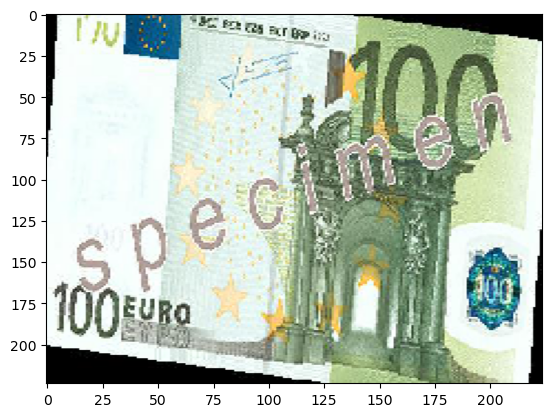

predicted: 100 (Correctly classified)


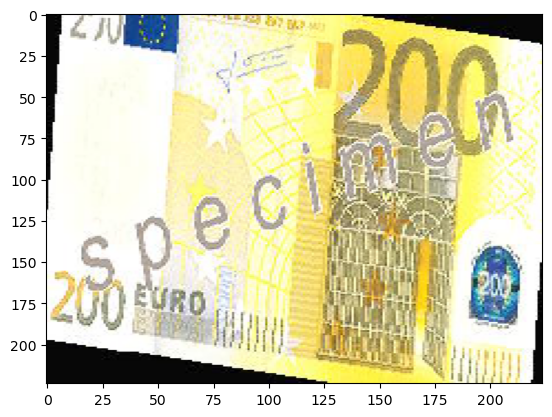

predicted: 200 (Correctly classified)


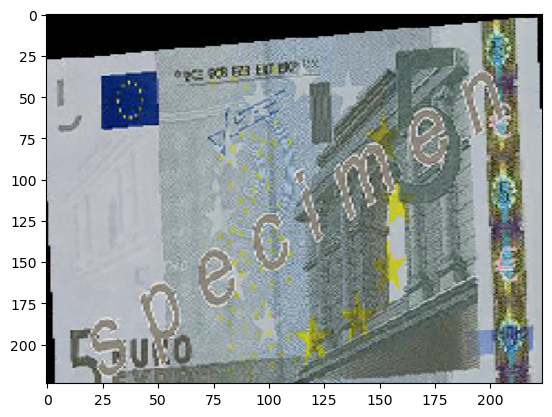

predicted: 200 (Incorrectly classified)


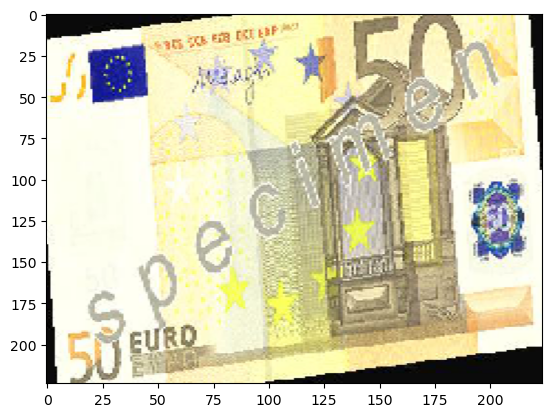

predicted: 100 (Incorrectly classified)


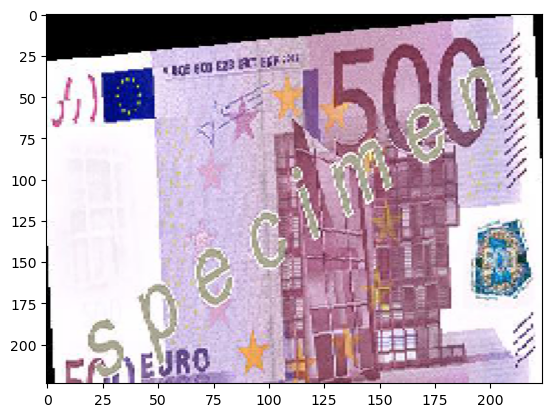

predicted: 200 (Incorrectly classified)


In [17]:
# Plot five random images and their predictions

random.seed(0)
numbers = [random.randint(0, 69) for i in range(0, 5)]

# Type your code here

pred = np.argmax(model.predict_generator(test_valid_generator, 14)[numbers], axis=1)

class_labels = train_generator.class_indices
pred_labels = [list(class_labels.keys())[list(class_labels.values()).index(i)] for i in pred]
true_labels = [test_valid_generator.filenames[i].split('/')[0] for i in numbers]

ndx = 0
for i in numbers:
    result_string = 'predicted: {}'.format(pred_labels[ndx])
    if pred_labels[ndx] == true_labels[ndx]:
        result_string += ' (Correctly classified)'
    else:
        result_string += ' (Incorrectly classified)'
    plt.imshow(test_valid_generator[i // 5][0][i % 5].astype(np.uint8), aspect='auto')
    plt.show()
    print(result_string)
    ndx += 1

<h3 id="q34">Question 3.4: Use the second model <code>VGG16</code> to do the prediction</h3><b>5 points</b>


Repeat the steps in Question 3.1, 3.2 to predict the result using <code>VGG16</code> model. Then, print out the last validation accuracy.


<p>Steps:</p>
<ol>
    <li>Load the pre-trained model VGG16</li>
    <li>Replace the last classification layer with only 7 classes</li>
    <li>Set the configuration (parameters) using <code>MODEL.compile()</code></li>
    <li>Train the model</li>
    <li>Print the last validation accuracy</li>
</ol>


Hint:
<ol>
    <li>Use optimizer <code>Adam</code></li>
    <li>Use loss function <code>categorical_crossentropy</code></li>
    <li>Epoches = 5</li>
</ol>


You are welcome to try any pattern of setting and find out the best result. Please name the model variable as <code>model_vgg</code>.<br> <b>(Your peer reviewer is going to mark based on what you print here.)</b>


In [18]:
# Use VGG16 to train the model and print out the last validation accuracy.

# Type your code here
vgg = VGG16(weights='imagenet')

for layer in vgg.layers:
    layer.trainable = False

553467904/553467096 [==============================] - 2s 0us/step


In [19]:
sec_last_vgg = vgg.layers[-2].output
connected_vgg = Dense(len(classes),activation = 'softmax')(sec_last_vgg)
vgg_input = vgg.input
model_vgg = Model (input = vgg_input,output = connected_vgg)
model_vgg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  after removing the cwd from sys.path.


In [20]:
model_vgg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
model_vgg.fit_generator(generator=train_generator, steps_per_epoch=STEPS, epochs=5, validation_data=valid_generator)

Epoch 1/5
7/7 [==============================] - 80s 11s/step - loss: 1.6426 - acc: 0.5000 - val_loss: 0.5921 - val_acc: 0.8571
Epoch 2/5
7/7 [==============================] - 77s 11s/step - loss: 0.3929 - acc: 0.8857 - val_loss: 0.1996 - val_acc: 0.9714
Epoch 3/5
7/7 [==============================] - 75s 11s/step - loss: 0.0530 - acc: 1.0000 - val_loss: 0.1610 - val_acc: 0.9714
Epoch 4/5
7/7 [==============================] - 76s 11s/step - loss: 0.0410 - acc: 1.0000 - val_loss: 0.1130 - val_acc: 0.9857
Epoch 5/5
7/7 [==============================] - 75s 11s/step - loss: 0.0140 - acc: 1.0000 - val_loss: 0.0566 - val_acc: 0.9857


In [22]:
train_history_vgg = model_vgg.history.history

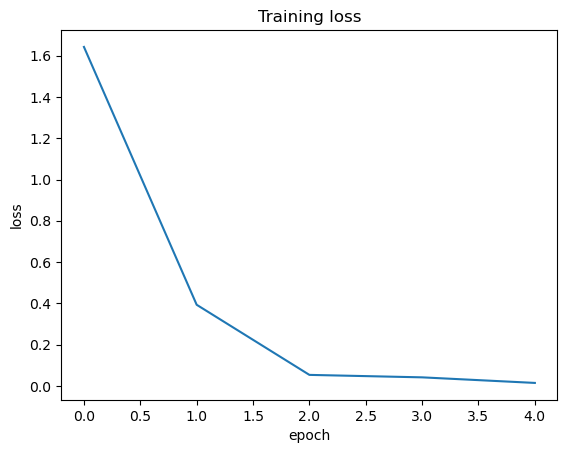

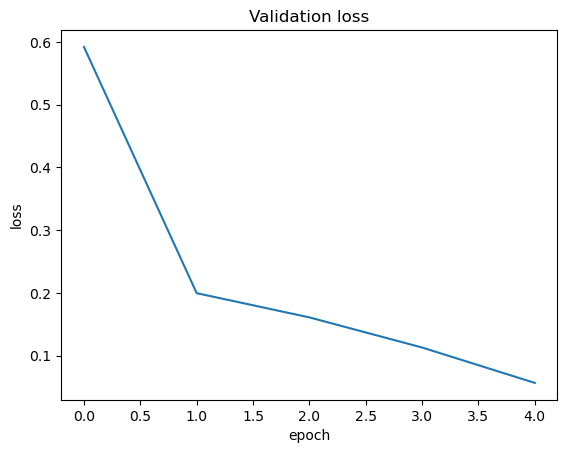

In [23]:
plt.title("Training loss")
plt.ylabel("loss")
plt.xlabel('epoch')
plt.plot(train_history_vgg['loss'])
plt.show()

plt.title("Validation loss")
plt.ylabel("loss")
plt.xlabel('epoch')
plt.plot(train_history_vgg['val_loss'])
plt.show()

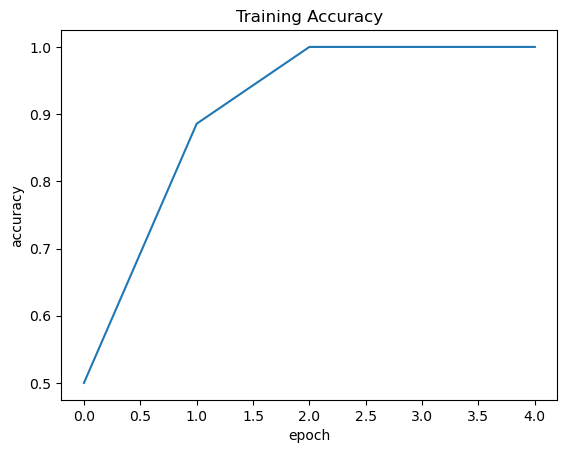

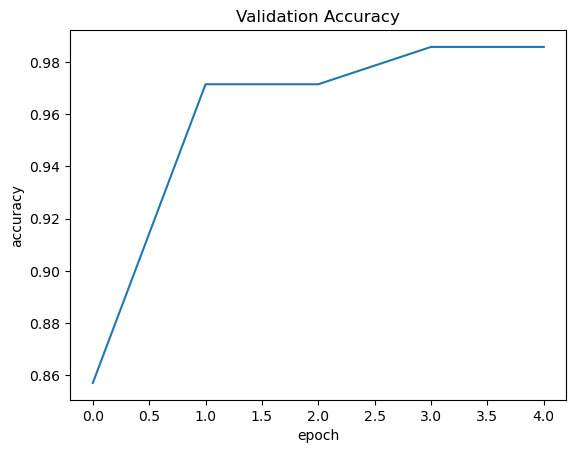

In [24]:
plt.title("Training Accuracy")
plt.ylabel("accuracy")
plt.xlabel('epoch')
plt.plot(train_history_vgg['acc'])
plt.show()

plt.title("Validation Accuracy")
plt.ylabel("accuracy")
plt.xlabel('epoch')
plt.plot(train_history_vgg['val_acc'])
plt.show()

In [25]:
print("The last Validation Accuracy is : 0.9714 ")

The last Validation Accuracy is : 0.9714 


<h2 id="#save">Save the trained model</h2>


Save the trained model for the following chapters


In [26]:
# Save the model

model.save("resnet50_keras.pt")
model_vgg.save("vgg16_keras.pt")

<a href="https://cocl.us/DLO0320EN_notebook_bott">
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0320EN/Assets/Images/Bottom.png" width="750" alt="cognitive class">
</a>


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0320ENSkillsNetwork929-2023-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


Other contributors: <a href="https://www.linkedin.com/in/michelleccarey/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0320ENSkillsNetwork929-2023-01-01">Michelle Carey</a>, <a href="www.linkedin.com/in/jiahui-mavis-zhou-a4537814a">Mavis Zhou</a>, <a href="https://www.linkedin.com/in/yi-leng-yao-84451275/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0320ENSkillsNetwork929-2023-01-01">Yi Leng Yao</a>


<hr>


Copyright &copy; 2018 <a href="cognitiveclass.ai?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu">cognitiveclass.ai</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0320ENSkillsNetwork929-2023-01-01">MIT License</a>.
